#**Importing** **the** **Dependencies**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
sns.set()



Data Collection and Processing

In [ ]:
# loading the data from csv to pandas data
car_dataset=pd.read_csv('/content/quikr_car.csv')

In [ ]:
#Inspecting the first 5 rows of the dataframe
car_dataset.head()


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
#checking the number of rwos and columns
car_dataset.shape

(892, 6)

In [ ]:
#getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [ ]:
#checking the number of missing values
car_dataset.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [ ]:
#checking the distribution of categorical data
print(car_dataset.fuel_type.value_counts())
print(car_dataset.kms_driven.value_counts())

fuel_type
Petrol    440
Diesel    395
LPG         2
Name: count, dtype: int64
kms_driven
45,000 kms      30
35,000 kms      30
55,000 kms      25
50,000 kms      23
20,000 kms      22
                ..
1,03,553 kms     1
29,685 kms       1
30,874 kms       1
49,800 kms       1
1,66,000 kms     1
Name: count, Length: 258, dtype: int64


ENCODING THE CATEGORCIAL DATA

In [ ]:
#encoding the fuel_type column
car_dataset.replace({'fuel_type':{'Petrol':0, 'Diesel':1 , 'LPG':3}},inplace=True)



In [ ]:
car_dataset.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",0.0
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,1.0
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",0.0
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",0.0
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",1.0


Splittng the data into training data and test data

In [ ]:
#splitting the data into training data and test data
X=car_dataset.drop(['name'], axis=1)
Y= car_dataset['name']


In [ ]:
print(X)

       company  year          Price  kms_driven  fuel_type
0      Hyundai  2007         80,000  45,000 kms        0.0
1     Mahindra  2006       4,25,000      40 kms        1.0
2       Maruti  2018  Ask For Price  22,000 kms        0.0
3      Hyundai  2014       3,25,000  28,000 kms        0.0
4         Ford  2014       5,75,000  36,000 kms        1.0
..         ...   ...            ...         ...        ...
887       Tara  zest       3,10,000         NaN        NaN
888       Tata  2018       2,60,000  27,000 kms        1.0
889   Mahindra  2013       3,90,000  40,000 kms        1.0
890      Honda  2014       1,80,000      Petrol        NaN
891  Chevrolet  2014       1,60,000      Petrol        NaN

[892 rows x 5 columns]


In [ ]:
print(Y)

0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
2                  Maruti Suzuki Alto 800 Vxi
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
                        ...                  
887                                        Ta
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
890                  Honda Amaze 1.2 E i VTEC
891                 Chevrolet Sail 1.2 LT ABS
Name: name, Length: 892, dtype: object


Splitting Training data and Test data


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training

In [21]:
#loading the linear regression model
lin_reg_model=LinearRegression()

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'X' is your DataFrame with categorical columns
# Replace 'fuel_type' and 'kms_driven' with the actual names of your categorical columns

# Check and convert the target variable 'Y' to numeric
Y = pd.to_numeric(Y, errors='coerce')  # 'coerce' will replace non-numeric values with NaN

# Reset index of both X and Y to ensure they start from 0
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

# Train the Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)




LinearRegression()

MODEL EVALUATION

In [48]:
Y_pred=lin_reg_model.predict(X_train)

In [49]:
#prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)

In [52]:
#R squared error
from sklearn import metrics
error_score= metrics.r2_score(Y_train, training_data_prediction)
print("R sqaured Error :", error_score)

R sqaured Error : 0.6924319010877082


VISUALIZING THE ACTUAL PRICES AND PREDICTED PRICES

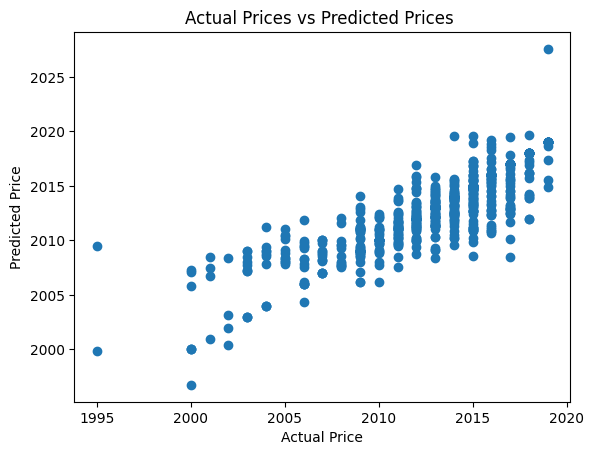

In [54]:
import matplotlib.pyplot as plt
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices ")
plt.show()


In [55]:
#prediction on training data
test_data_prediction=lin_reg_model.predict(X_test)

In [57]:
# R Sqaured Error
error_score= metrics.r2_score(Y_test, test_data_prediction)
print("R sqaured Error :", error_score)


R sqaured Error : -146000119773.6572


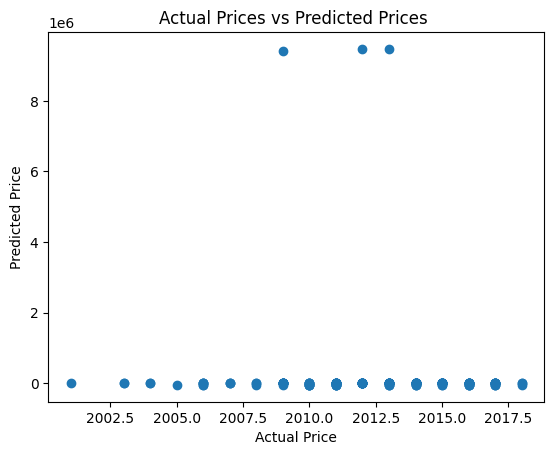

In [58]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices ")
plt.show()


Lasso Regression

In [61]:
#loading the Lasso Model
from sklearn.linear_model import Lasso
las_reg_model=Lasso()

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

Y = pd.to_numeric(Y, errors='coerce')

# Reset index of both X and Y to ensure they start from 0
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

# Train the Linear Regression model
las_reg_model = Lasso()
las_reg_model.fit(X_train, Y_train)

Lasso()

In [63]:
#prediction on training data
training_data_prediction=las_reg_model.predict(X_train)

In [64]:
#R squared error
from sklearn import metrics
error_score= metrics.r2_score(Y_train, training_data_prediction)
print("R sqaured Error :", error_score)

R sqaured Error : 0.12667236290453276


VISUALIZING THE ACTUAL PRICES AND PREDICTED PRICES

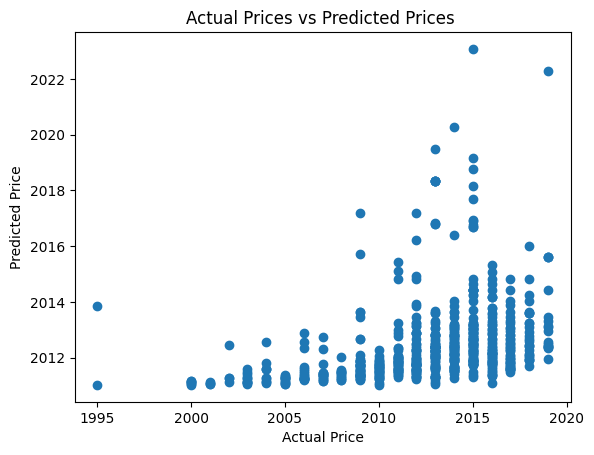

In [65]:
import matplotlib.pyplot as plt
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices ")
plt.show()


In [66]:
#prediction on training data
test_data_prediction=las_reg_model.predict(X_test)

In [67]:
# R Sqaured Error
error_score= metrics.r2_score(Y_test, test_data_prediction)
print("R sqaured Error :", error_score)


R sqaured Error : -0.42111372130848657


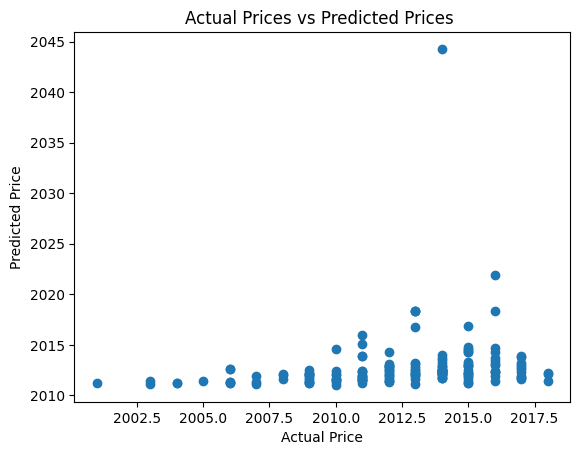

In [68]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices ")
plt.show()
